In [3]:
!pip3 install essentia

     |████████████████████████████████| 12.0 MB 4.5 MB/s 


In [4]:
!pip3 install madmom

     |████████████████████████████████| 20.0 MB 2.1 MB/s 
     |████████████████████████████████| 51 kB 5.5 MB/s 
  Created wheel for madmom: filename=madmom-0.16.1-cp37-cp37m-linux_x86_64.whl size=20934148 sha256=443bd9e0715d86722bf7dcd89e374bbe37a5cb650893b35b80e8b8a9e4f85f02
  Stored in directory: /root/.cache/pip/wheels/af/90/61/393ceef814b55b12d1b59b5ed3a2b2a3457a55d39b7363b975
Successfully built madmom


In [5]:
!pip3 install mir_eval

     |████████████████████████████████| 87 kB 3.3 MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96514 sha256=e9b89e08fd42bcc7c1a0cbecc9cb0f60cbab2a0804848ad1b6af322d074e64d6
  Stored in directory: /root/.cache/pip/wheels/08/28/2d/006dbad29550bac8daf049ff34fa882655a7d3e77f3b67595e
Successfully built mir-eval


The section below is all path dependent

In [6]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [7]:
import madmom

In [8]:
!ls 'drive/MyDrive/Bass'

 001_beats.csv
 001_beats.gsheet
 002_beats.csv
 abesser_music
 bassunet.py
 data
 data_old
 deviations
 EnergyChecker_AllStems.ipynb
 EnergyChecker_Student_TrinityBillieJean.ipynb
 grades
 HistogramTestBillieJean.ipynb
 HistogramTestBrown.ipynb
 HistogramTestJust.ipynb
 HistogramTestRoad.ipynb
 HistogramTestWOTM.ipynb
 HistogramTestYellow.ipynb
 IEC_billieJean.csv
 __init__.py
 LICENSE
 music
 notebooks_june
 notebooks_may
 pooling.py
 __pycache__
 README.md
 SG_Student_TrinityWOTM.ipynb
 SOP_Student_TrinityBillieJean.ipynb
 statistics
 Statistics_IEC_billieJean.csv
 StudentStatistics_BillieJean.csv
 StudentStatistics_blend_justlooking.csv
 StudentStatisticsInput.csv
 tcl_annotate
 Test_Student_ONSET_TrinityYellow.ipynb
'Thesis Review Meeting.gdoc'
 txt


In [9]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [10]:
import mir_eval
from mir_eval import *

In [11]:
!ls drive/MyDrive/Bass/statistics

AllStatistics_IEC_Yellow.csv	    StemStatistics_SOP_yellow.csv
Statistics_IEC_billieJean.csv	    StudentStatistics_blend_brown.csv
StemStatistics_IEC_billieJean.csv   StudentStatistics_blend_roadrunner.csv
StemStatistics_IEC_brown.csv	    StudentStatistics_blend_wotm.csv
StemStatistics_IEC_justlooking.csv  StudentStatistics_IEC_brown.csv
StemStatistics_IEC_yellow.csv	    StudentStatistics_IEC_justlooking.csv
StemStatistics_SOP_billieJean.csv   StudentStatistics_IEC_Yellow.csv
StemStatistics_SOP_brown.csv	    StudentStatistics_SOP_brown.csv
StemStatistics_SOP_justlooking.csv  StudentStatistics_SOP_yellow.csv


In [19]:
deviatePath = 'drive/MyDrive/Bass/data/bjean/bjean_devs_student0.csv'
col_list = ["onset dev", "offset dev"]
df = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = df["onset dev"]
offset_dev_list = df["offset dev"] 

In [21]:
statsPath = 'drive/MyDrive/Bass/data/bjean/StudentStatistics_bjean.csv'
statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark "," TF 2 Mark ","Sound Quality Mark"," finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [22]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(len(onset_mean_list))
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

16


In [23]:
print(type(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)

<class 'list'>
[0.001, 0.001, 0.001, -0.004, 0.004, -0.001, 0.01, -0.011000000000000001, -0.003, -0.002, 0.002, 0.0, 0.0, 0.001, -0.001, -0.003]


In [26]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
from math import *
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,df,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations
   #statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std",
   #   GRADES  "onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
   list0 = df["onsetMark"].tolist()  
   list1 = df[" DurationMark"].tolist()  
   list2 = df[" TF 1 Mark "].tolist()  
   list3 = df[" TF 2 Mark "].tolist()  
   list4 = df["Sound Quality Mark"].tolist()  
   list5 = df[" finalMark"].tolist()  
   #k = 0 # Zeroth student is GT
   print("Onset Grade = ", list0[k],"\t" ,"Offset Grade = ", list1[k])
   print("\n")
   print("Articulation Grade = ", list2[k],"Sound Q Grade = ", list3[k], "Volume Control Grade = ", list4[k])
   print("Final Mark = ", list5[k])
   print("ok1")
   a= deviationsArray1
   m= mean(a)
   print(m)
   s = sqrt(mean(a*a))
   print("ok3")
   am = mean(abs(a))

   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student "  + str(k) +title_text1
   plt.subplot(2,2,1)
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = deviationsArray2
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k) +title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()

Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
0.00118773927368413
ok3


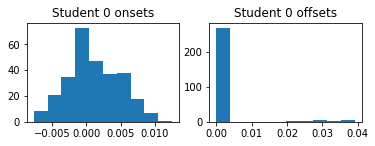

In [27]:
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",df_all,0)

In [28]:
index = df_all.index
number_of_rows = len(index)
print(number_of_rows)

k=0
# sonset_deviations,soffset_deviations,
while k<number_of_rows:

   k+=1

16


Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
0.001376460285714556
ok3


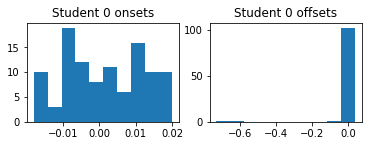

Onset Grade =  79.2 	 Offset Grade =  79.2


Articulation Grade =  72.0 Sound Q Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  3.6
ok1
0.0008674797532467024
ok3


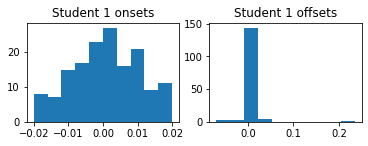

Onset Grade =  56.7 	 Offset Grade =  72.0


Articulation Grade =  72.0 Sound Q Grade =  72.0 Volume Control Grade =  72.0
Final Mark =  2.7
ok1
-0.004362127739725994
ok3


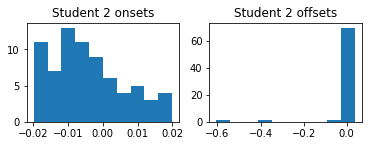

Onset Grade =  72.0 	 Offset Grade =  79.2


Articulation Grade =  79.2 Sound Q Grade =  90.0 Volume Control Grade =  79.2
Final Mark =  3.6
ok1
0.004236678249999005
ok3


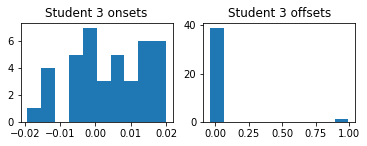

Onset Grade =  72.0 	 Offset Grade =  79.2


Articulation Grade =  79.2 Sound Q Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  3.6
ok1
-0.0009979438533334554
ok3


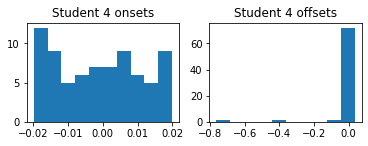

Onset Grade =  79.2 	 Offset Grade =  79.2


Articulation Grade =  72.0 Sound Q Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  2.7
ok1
0.010120670411763661
ok3


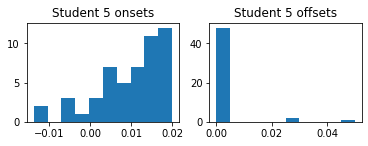

Onset Grade =  79.2 	 Offset Grade =  90.0


Articulation Grade =  90.0 Sound Q Grade =  90.0 Volume Control Grade =  79.2
Final Mark =  4.05
ok1
-0.010997732666665882
ok3


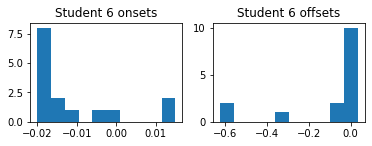

Onset Grade =  79.2 	 Offset Grade =  79.2


Articulation Grade =  79.2 Sound Q Grade =  72.0 Volume Control Grade =  56.7
Final Mark =  1.8
ok1
-0.003178365615383993
ok3


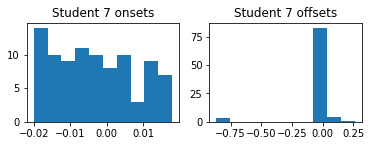

Onset Grade =  56.7 	 Offset Grade =  72.0


Articulation Grade =  79.2 Sound Q Grade =  79.2 Volume Control Grade =  72.0
Final Mark =  2.7
ok1
-0.002046289310344501
ok3


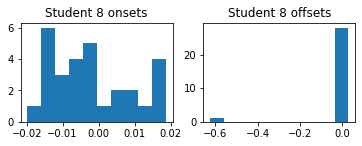

Onset Grade =  56.7 	 Offset Grade =  33.300000000000004


Articulation Grade =  33.300000000000004 Sound Q Grade =  56.7 Volume Control Grade =  33.300000000000004
Final Mark =  0.9
ok1
0.0018796698360655111
ok3


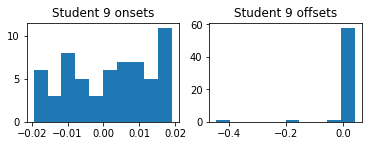

Onset Grade =  56.7 	 Offset Grade =  33.300000000000004


Articulation Grade =  33.300000000000004 Sound Q Grade =  56.7 Volume Control Grade =  33.300000000000004
Final Mark =  0.0
ok1
2.4468452702922905e-05
ok3


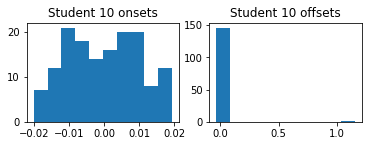

Onset Grade =  79.2 	 Offset Grade =  79.2


Articulation Grade =  90.0 Sound Q Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  3.6
ok1
1.557998639460876e-05
ok3


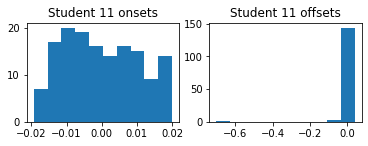

Onset Grade =  72.0 	 Offset Grade =  72.0


Articulation Grade =  72.0 Sound Q Grade =  72.0 Volume Control Grade =  79.2
Final Mark =  2.7
ok1
0.0013916316621624058
ok3


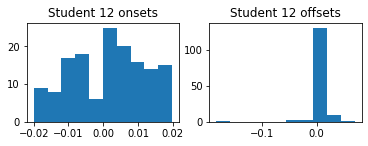

Onset Grade =  79.2 	 Offset Grade =  79.2


Articulation Grade =  79.2 Sound Q Grade =  72.0 Volume Control Grade =  79.2
Final Mark =  3.15
ok1
-0.0007097214358970755
ok3


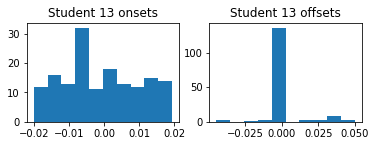

Onset Grade =  90.0 	 Offset Grade =  90.0


Articulation Grade =  90.0 Sound Q Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
ok1
-0.003290495777173871
ok3


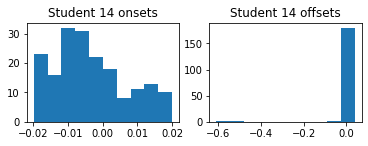

In [30]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<number_of_rows-1:
   sdeviatePath = 'drive/MyDrive/Bass/data/bjean/bjean_devs_student' + str(k+1)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

In [31]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,1.000,0.997,0.998,0.003,0.001,0.004,0.003,0.001,0.004,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.361,0.367,0.364,0.009,0.001,0.011,0.094,-0.051,0.220,79.2,79.2,72.0,79.2,79.2,3.60
2,2,0.579,0.538,0.558,0.008,0.001,0.010,0.042,0.017,0.070,56.7,72.0,72.0,72.0,72.0,2.70
3,3,0.253,0.255,0.254,0.010,-0.004,0.012,0.094,-0.068,0.202,72.0,79.2,79.2,90.0,79.2,3.60
4,4,0.150,0.140,0.145,0.009,0.004,0.011,0.090,0.075,0.267,72.0,79.2,79.2,79.2,79.2,3.60
5,5,0.261,0.262,0.262,0.011,-0.001,0.012,0.148,-0.126,0.290,79.2,79.2,72.0,79.2,79.2,2.70
6,6,0.172,0.178,0.175,0.012,0.010,0.013,0.037,0.037,0.038,79.2,90.0,90.0,90.0,79.2,4.05
7,7,0.054,0.052,0.053,0.015,-0.011,0.016,0.194,-0.169,0.307,79.2,79.2,79.2,72.0,56.7,1.80
8,8,0.300,0.318,0.309,0.010,-0.003,0.011,0.147,-0.090,0.319,56.7,72.0,79.2,79.2,72.0,2.70
9,9,0.097,0.101,0.099,0.010,-0.002,0.012,0.140,-0.128,0.280,56.7,33.3,33.3,56.7,33.3,0.90


In [32]:
dataReduced = df_all.drop(labels=[9,10], axis=0)

In [33]:
print(dataReduced)

    Student  precision  recall  ...   TF 2 Mark   Sound Quality Mark   finalMark
0         0      1.000   0.997  ...        100.0               100.0        5.00
1         1      0.361   0.367  ...         79.2                79.2        3.60
2         2      0.579   0.538  ...         72.0                72.0        2.70
3         3      0.253   0.255  ...         90.0                79.2        3.60
4         4      0.150   0.140  ...         79.2                79.2        3.60
5         5      0.261   0.262  ...         79.2                79.2        2.70
6         6      0.172   0.178  ...         90.0                79.2        4.05
7         7      0.054   0.052  ...         72.0                56.7        1.80
8         8      0.300   0.318  ...         79.2                72.0        2.70
11       11      0.679   0.517  ...         90.0                90.0        3.60
12       12      0.626   0.514  ...         72.0                79.2        2.70
13       13      0.661   0.5

In [39]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark "," TF 2 Mark ","Sound Quality Mark"," finalMark"]

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/bjean/StudentStatistics_blend_billieJeanscaled2.csv', 'w', encoding='UTF8') as f:


      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0



      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df[" TF 2 Mark "].tolist()  
      list4 = df["Sound Quality Mark"].tolist()  
      list5 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
  
      for k in range(number_of_rows-1):
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          print(a[0:12])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          print("list0[k]")
          print(list0[k])
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k], "Volume Control Grade = ", list4[k])
          print("Final Mark = ", list5[k])
          studentStatistics = []
          studentStatistics.append(str(k+1))
          studentStatistics.append(round(listp[k],3))
          print("////////////////////////////")
          print(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          studentStatistics.append(list5[k])
          # write the data

          studentStatisticsArray.append(studentStatistics)
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


16
[ 0.01878685  0.01514739  0.00492063  0.01628118  0.01310658  0.01803855
 -0.00924036  0.01229025  0.01727891 -0.005       0.015      -0.005     ]
list0[k]
100.0
Student 0 offset


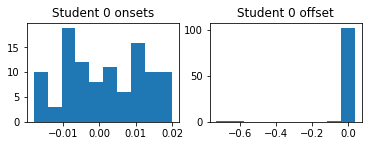

Onset Grade =  100.0 	 Duration Grade =  100.0


Onset ABS  Mean: 0.009429,Onset Mean: 0.001376, Dev. from 0: 0.010761


Offset Mean: -0.009759, Dev. from 0: 0.096131


Articulation Grade =  100.0 Sound Control Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
////////////////////////////
1.0
[ 0.00654195  0.00790249  0.01520408  0.01995465  0.00767574 -0.00096372
  0.00878685  0.00514739 -0.00891157  0.00880952  0.00017007 -0.00871882]
list0[k]
79.2
Student 1 offset


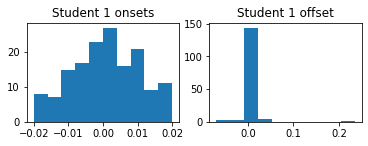

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.007855,Onset Mean: 0.000867, Dev. from 0: 0.009658


Offset Mean: 0.001590, Dev. from 0: 0.021096


Articulation Grade =  72.0 Sound Control Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  3.6
////////////////////////////
0.361
[ 0.01679138 -0.00345805 -0.00709751  0.01087302  0.00384354  0.00495465
 -0.00046485 -0.00232426 -0.00596372 -0.01121315 -0.01985261  0.00972789]
list0[k]
56.7
Student 2 offset


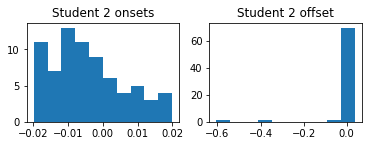

Onset Grade =  56.7 	 Duration Grade =  72.0


Onset ABS  Mean: 0.009907,Onset Mean: -0.004362, Dev. from 0: 0.011607


Offset Mean: -0.012089, Dev. from 0: 0.085090


Articulation Grade =  72.0 Sound Control Grade =  72.0 Volume Control Grade =  72.0
Final Mark =  2.7
////////////////////////////
0.579
[0.01992063 0.00741497 0.00310658 0.00329932 0.01554422 0.00809524
 0.00531746 0.01303855 0.01575964 0.01214286 0.00141723 0.0107483 ]
list0[k]
72.0
Student 3 offset


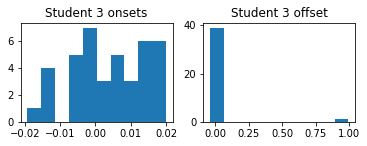

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009249,Onset Mean: 0.004237, Dev. from 0: 0.011381


Offset Mean: 0.026244, Dev. from 0: 0.157860


Articulation Grade =  79.2 Sound Control Grade =  90.0 Volume Control Grade =  79.2
Final Mark =  3.6
////////////////////////////
0.253
[ 1.7460317e-02  1.8843537e-02  1.9954649e-02  7.6757370e-03
  4.7278910e-03 -1.2551020e-02  9.9206300e-03 -5.7483000e-03
 -1.2777780e-02 -5.6690000e-05  7.9138300e-03 -3.9455800e-03]
list0[k]
72.0
Student 4 offset


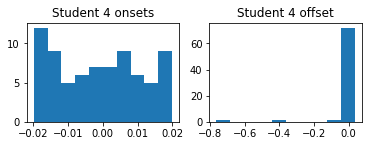

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.010686,Onset Mean: -0.000998, Dev. from 0: 0.012389


Offset Mean: -0.015125, Dev. from 0: 0.100551


Articulation Grade =  79.2 Sound Control Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  3.6
////////////////////////////
0.15
[ 0.01770975  0.01105442  0.01716553  0.01075964  0.01978458  0.02
  0.005       0.005       0.01464853 -0.01060091  0.014       0.0189229 ]
list0[k]
79.2
Student 5 offset


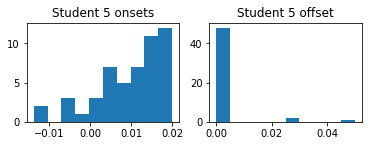

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.011722,Onset Mean: 0.010121, Dev. from 0: 0.013061


Offset Mean: 0.002157, Dev. from 0: 0.009182


Articulation Grade =  72.0 Sound Control Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  2.7
////////////////////////////
0.261
[-0.0180839  -0.00128118 -0.00311791  0.01282313 -0.01654195 -0.01857143
 -0.01560091 -0.01088435 -0.015      -0.02       -0.02       -0.02      ]
list0[k]
79.2
Student 6 offset


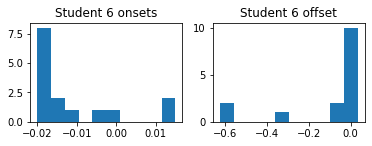

Onset Grade =  79.2 	 Duration Grade =  90.0


Onset ABS  Mean: 0.014707,Onset Mean: -0.010998, Dev. from 0: 0.015709


Offset Mean: -0.101223, Dev. from 0: 0.238094


Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  79.2
Final Mark =  4.05
////////////////////////////
0.172
[-0.00753968  0.01179138  0.01654195  0.01290249 -0.00479592  0.00267574
 -0.01096372 -0.00391156 -0.01255102  0.00492063 -0.00371882  0.00858277]
list0[k]
79.2
Student 7 offset


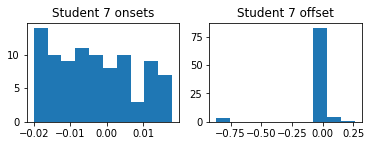

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009818,Onset Mean: -0.003178, Dev. from 0: 0.011458


Offset Mean: -0.021835, Dev. from 0: 0.156903


Articulation Grade =  79.2 Sound Control Grade =  72.0 Volume Control Grade =  56.7
Final Mark =  1.8
////////////////////////////
0.054
[-0.01402494 -0.00061224 -0.0092517   0.01846939  0.00891156  0.00646259
 -0.00403628 -0.00562358  0.00073696  0.01439909 -0.00312925  0.01823129]
list0[k]
56.7
Student 8 offset


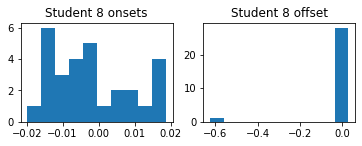

Onset Grade =  56.7 	 Duration Grade =  72.0


Onset ABS  Mean: 0.010122,Onset Mean: -0.002046, Dev. from 0: 0.011611


Offset Mean: -0.022017, Dev. from 0: 0.116383


Articulation Grade =  79.2 Sound Control Grade =  79.2 Volume Control Grade =  72.0
Final Mark =  2.7
////////////////////////////
0.3
[ 0.01878685  0.01514739  0.00722222  0.01858277  0.00494331  0.01105442
  0.01216553  0.01854875 -0.01170068 -0.01034014  0.01560091  0.01696145]
list0[k]
56.7
Student 9 offset


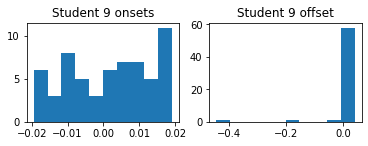

Onset Grade =  56.7 	 Duration Grade =  33.300000000000004


Onset ABS  Mean: 0.010748,Onset Mean: 0.001880, Dev. from 0: 0.012177


Offset Mean: -0.005712, Dev. from 0: 0.061775


Articulation Grade =  33.300000000000004 Sound Control Grade =  56.7 Volume Control Grade =  33.300000000000004
Final Mark =  0.9
////////////////////////////
0.097
[ 0.00770975  0.00246032  0.01543084  0.01179138 -0.00845805 -0.00912698
  0.00884354  0.00995465 -0.00732426 -0.00485261 -0.00527211 -0.00891157]
list0[k]
56.7
Student 10 offset


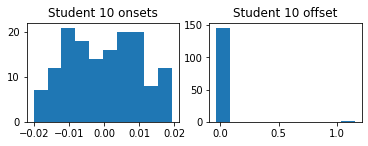

Onset Grade =  56.7 	 Duration Grade =  33.300000000000004


Onset ABS  Mean: 0.008649,Onset Mean: 0.000024, Dev. from 0: 0.010145


Offset Mean: 0.016668, Dev. from 0: 0.131932


Articulation Grade =  33.300000000000004 Sound Control Grade =  56.7 Volume Control Grade =  33.300000000000004
Final Mark =  0.0
////////////////////////////
0.215
[ 0.00770975 -0.01253968  0.01679138  0.00154195 -0.01912698  0.00884354
  0.00520408  0.00267574  0.00403628 -0.01621315 -0.00027211  0.00608844]
list0[k]
79.2
Student 11 offset


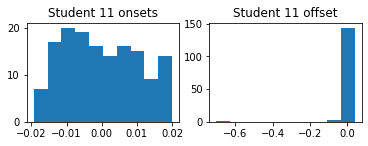

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009026,Onset Mean: 0.000016, Dev. from 0: 0.010651


Offset Mean: -0.004578, Dev. from 0: 0.058574


Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  3.6
////////////////////////////
0.679
[ 0.00270975  0.01246032  0.01179138 -0.00345805 -0.01709751 -0.00115646
  0.00495465  0.01953515  0.00267574  0.01403628 -0.01621315 -0.01985261]
list0[k]
72.0
Student 12 offset


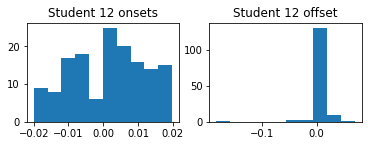

Onset Grade =  72.0 	 Duration Grade =  72.0


Onset ABS  Mean: 0.009129,Onset Mean: 0.001392, Dev. from 0: 0.010820


Offset Mean: 0.000419, Dev. from 0: 0.019095


Articulation Grade =  72.0 Sound Control Grade =  72.0 Volume Control Grade =  79.2
Final Mark =  2.7
////////////////////////////
0.626
[ 1.0430839e-02 -8.2086170e-03 -7.0975060e-03  1.8843537e-02
 -4.5351000e-05 -5.4648530e-03 -7.3242630e-03  2.4489800e-03
 -1.8718820e-02 -7.4830000e-04 -2.7777800e-03  1.7913830e-02]
list0[k]
79.2
Student 13 offset


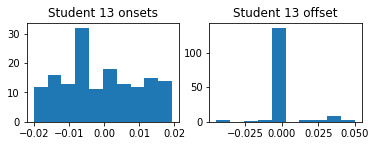

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009363,Onset Mean: -0.000710, Dev. from 0: 0.010977


Offset Mean: 0.002428, Dev. from 0: 0.012227


Articulation Grade =  79.2 Sound Control Grade =  72.0 Volume Control Grade =  79.2
Final Mark =  3.15
////////////////////////////
0.661
[ 0.01770975  0.00746032  0.00043084 -0.00820862 -0.01979592  0.01953515
 -0.00732426 -0.00596372 -0.00527211 -0.00891157 -0.00755102 -0.00119048]
list0[k]
90.0
Student 14 offset


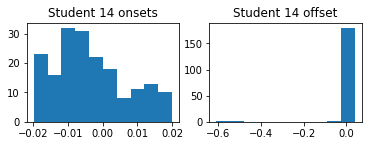

Onset Grade =  90.0 	 Duration Grade =  90.0


Onset ABS  Mean: 0.009416,Onset Mean: -0.003290, Dev. from 0: 0.011091


Offset Mean: -0.003813, Dev. from 0: 0.060820


Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
////////////////////////////
0.653


In [41]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

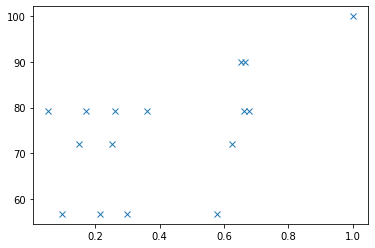

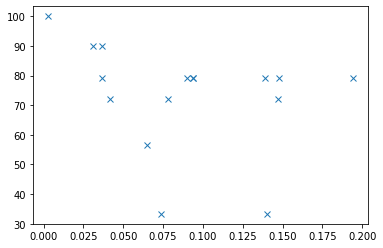

In [ ]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   

plt.plot(onset_precision_list,onset_grade_list, 'x')
plt.show()

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)

# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [36]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [37]:
deviatePath = 'drive/MyDrive/Bass/data/bjean/bjean_student0.csv'
dff = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = dff["onset dev"]

offset_dev_list = dff["offset dev"] 
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",df_all,0)

FileNotFoundError: ignored

In [ ]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [ ]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/bjean/StudentStatistics_bjean.csv')
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')


In [ ]:
dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value']]#,]]



y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

NameError: ignored

In [ ]:
dataset

In [ ]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataReduced[['precision','recall','f_measure_value','Duration ABS Mean']]
y=array(dataReduced[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
dataset.head()

In [ ]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
 	#Student, precision, recall, f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,
  #onsetMark, DurationMark, articulationMark, soundQualityMark, volumeControlMark, finalMark, DurAcc

In [ ]:
X = dataset[['precision','recall','f_measure_value','Duration Mean','Onset Mean']]
y=array(dataset[' articulationMark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset['volumeControlMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset['soundQualityMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))